## Comparing Results

In [327]:
result = Result()
result.update('average',X_test,y_test,'Crude Average',y_pred = avr_pred)
result.update(LM,X_test/mn,y_test,'Lasso' )
result.update(rf,X_test,y_test,'Random Forest')
result.update(DNN_model,X_test/mn,y_test,'DNN')
result.get()

,MAE,MSE
model,,
Crude Average,17.13,7.95
Lasso,16.85,7.78
Random Forest,13.74,6.72
DNN,15.53,7.29


### Libraries

In [74]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
get_ipython().magic('matplotlib inline')


In [6]:

director =  '/Users/z002df6/Downloads/'
fln = 'data.xlsx'
df = pd.read_excel(director+fln)
df.head()

,f,d,i1,i2,i3,i4,i5,i6,i7,i8,...,i17,i18,i19,o1,o2,o3,o4,o5,o6,o7
109356,1,32,2869,2754,2880,2754,2845,1847.627,68.280,112,...,77.10,722.467200,224.844983,12.007874,15.042459,9.171144,18.640534,32.695896,32.881831,12.184543
109357,1,33,2731,2731,2731,2731,2842,4.361,68.208,5,...,0.00,2.146484,0.000000,-0.105448,11.407291,12.599049,14.136546,31.696015,31.452359,14.828283
110098,1,34,2729,2729,2729,2729,2830,20.000,67.920,7,...,0.00,9.836000,0.000000,-0.422238,11.417323,14.435908,14.528531,32.739212,33.553563,14.205004
109358,1,35,2717,2717,2717,2717,2717,227.560,65.208,12,...,48.97,111.436132,0.000000,-3.992933,-4.499121,6.507252,6.590820,30.436870,29.937829,13.634463
109359,1,36,2702,2680,2825,2784,2784,3116.240,66.816,175,...,150.54,1508.517825,54.896280,2.465955,-2.040816,9.606299,5.534496,35.408560,28.650647,20.000000


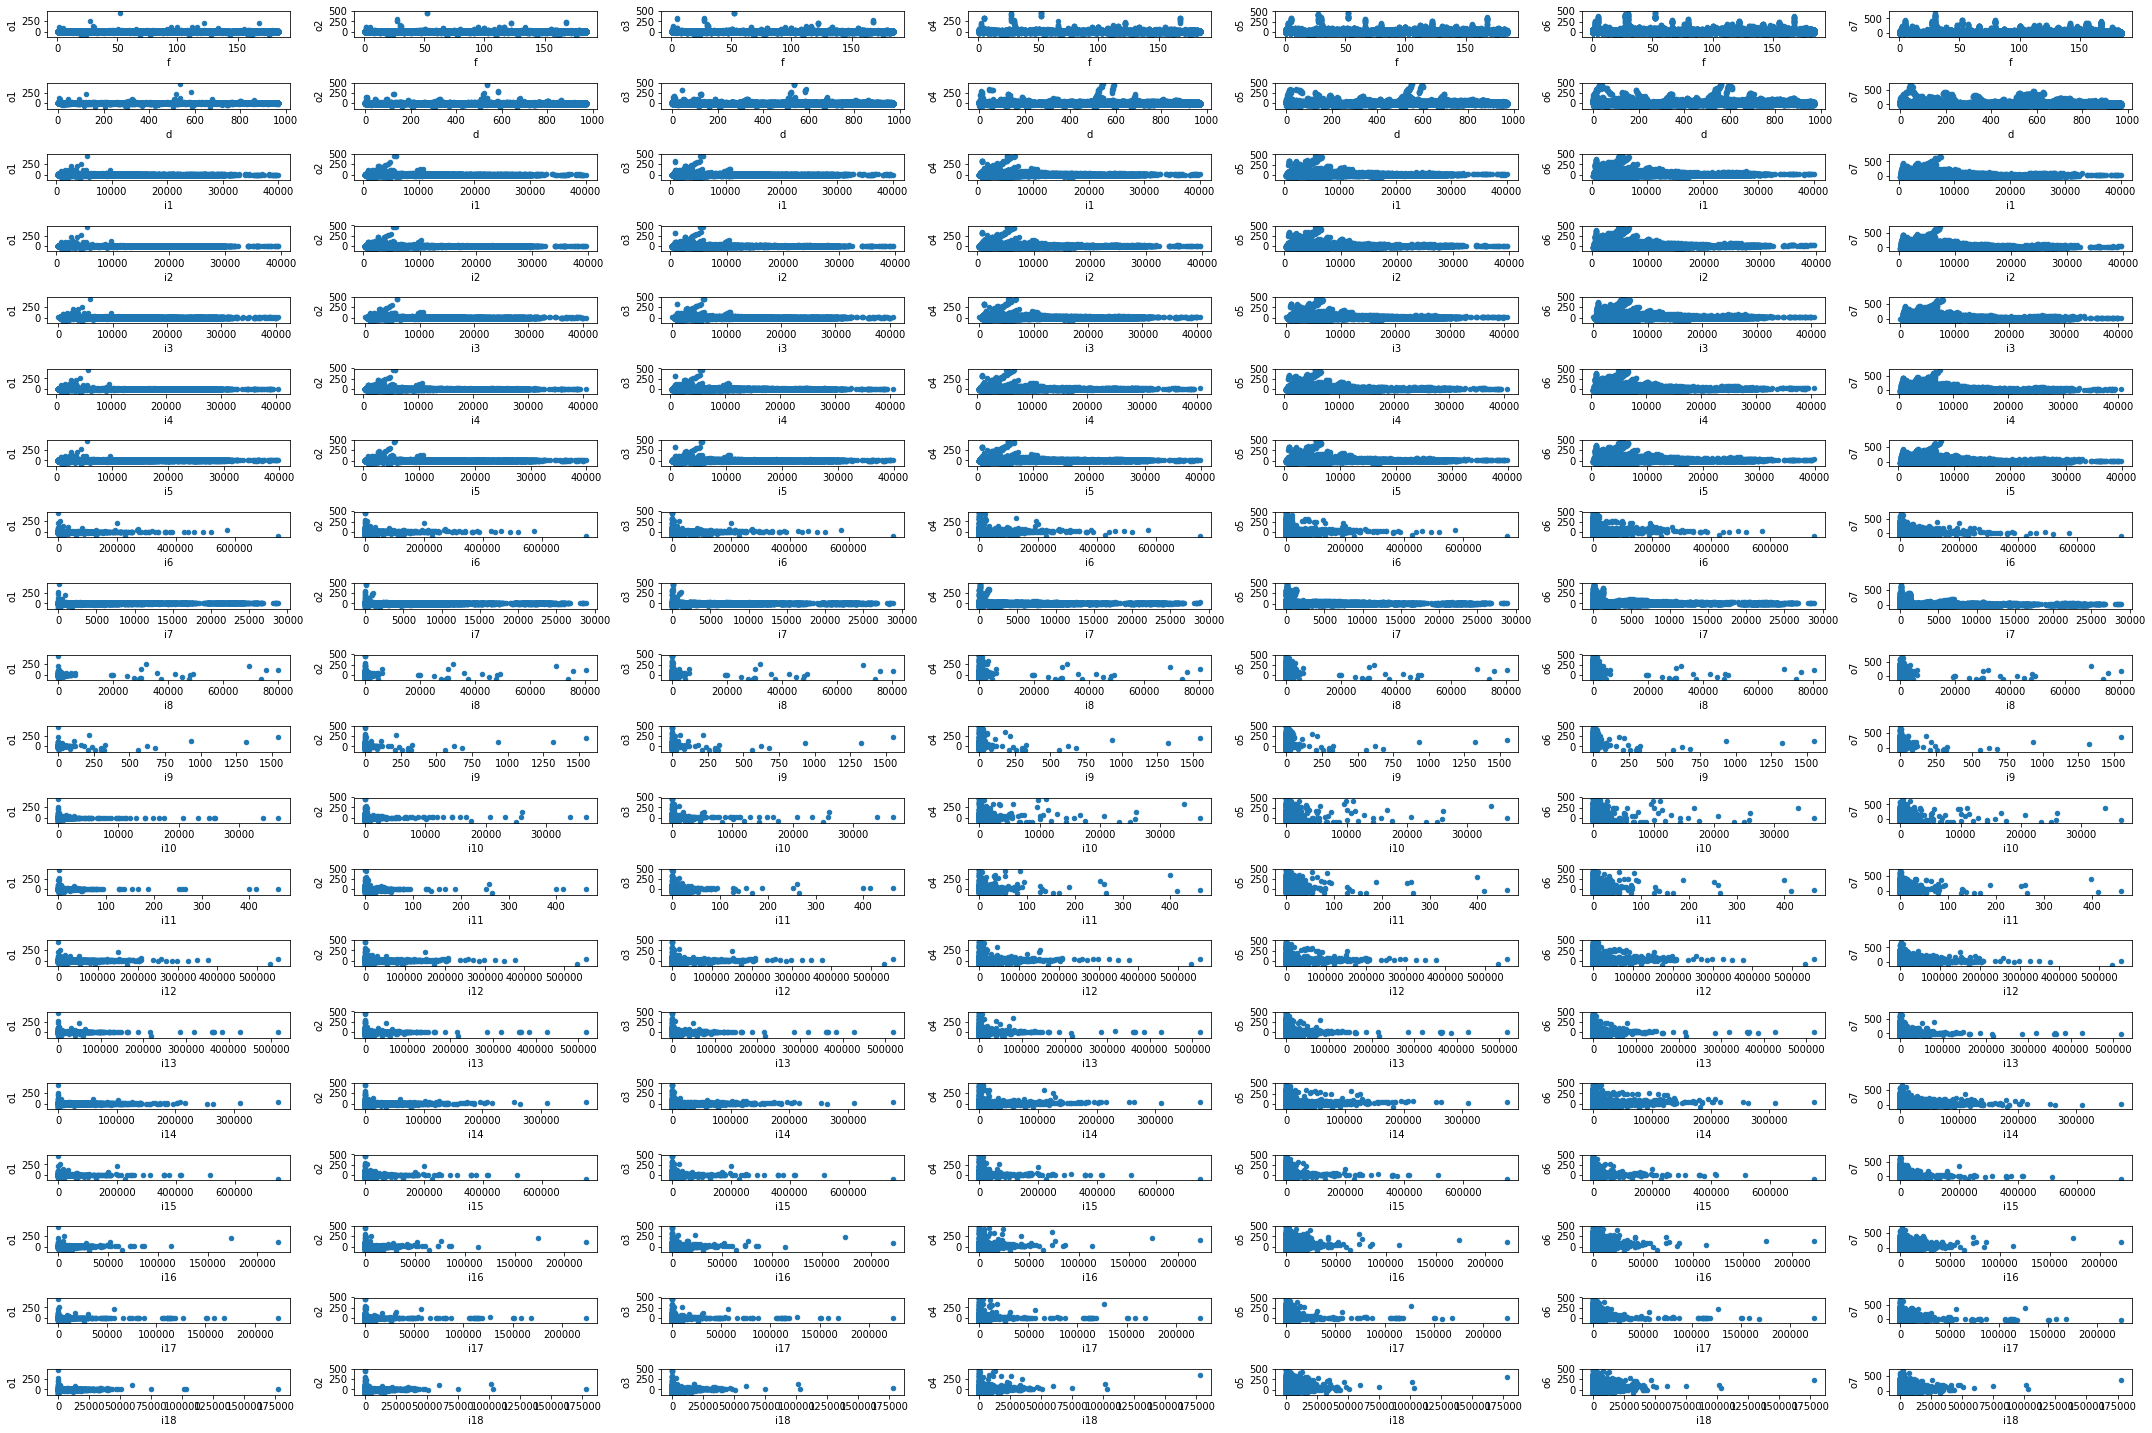

In [26]:
inputs = ['f','d']+list(map(lambda x: 'i'+str(x),range(1,19)))

fig, axes = plt.subplots(nrows=20, ncols=7, figsize=(30, 20))
for i in range(1,8):
    for j,name in enumerate(inputs):
        ax = df.plot.scatter( name,'o'+str(i),
                             ax = axes[j][i-1])
        ax.set(xlabel= name, ylabel='o'+str(i))
plt.tight_layout()
plt.show()

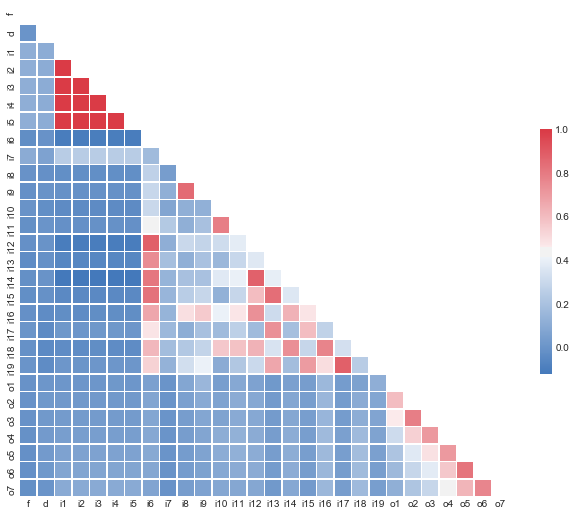

In [30]:
def CorrMtx(df, dropDuplicates = True):

    df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df, dropDuplicates = True)

In [53]:
inputs  = ['f','d']+list(map(lambda x: 'i'+str(x),range(1,19)))
outputs = ['o'+str(i) for i in range(1,8)]
X = np.array(df[inputs])
y = np.array(df[outputs])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [322]:
df[outputs].describe()

,o1,o2,o3,o4,o5,o6,o7
count,131500.000000,131500.000000,131500.000000,131500.000000,131500.000000,131500.000000,131500.000000
mean,0.044630,0.166113,0.303403,0.696031,1.584833,2.579578,4.873149
std,3.025306,5.758096,7.817769,11.777570,17.713294,22.486225,30.959541
min,-99.856569,-99.856380,-99.863956,-99.870610,-99.875400,-99.880327,-99.888785
25%,-0.841655,-1.977797,-2.757036,-4.220698,-6.143521,-7.658212,-9.605402
50%,-0.049523,-0.230780,-0.368338,-0.584392,-0.691296,-0.642683,-0.193798
75%,0.683626,1.662708,2.424858,3.911341,6.179691,8.303030,11.971003
max,450.500000,461.000000,461.000000,453.500000,470.100000,464.800000,698.210526


### Crude Average and Linear Model

In [ ]:
avr = y_train.mean(axis=0)
avr = avr[np.newaxis,:]
avr_pred = np.repeat(avr, y_test.shape[0], axis=0)
LM = Lasso(alpha=0.1)
LM.fit(X_train/mn, y_train)

### Random Forest

In [320]:
rf = RandomForestRegressor(n_estimators = 100, max_depth = 10)
# Train the model on training data
rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Deep Neural Net

In [269]:
DNN_model = Sequential()
DNN_model.add(Dense(100,input_dim=X_train.shape[1],init='uniform',activation='relu'))
DNN_model.add(Dropout(0.5))
DNN_model.add(Dense(50,init='uniform',activation='softmax'))
DNN_model.add(Dropout(0.5))
DNN_model.add(Dense(100,init='uniform',activation='relu'))
DNN_model.add(Dropout(0.5))
DNN_model.add(Dense(7,init='uniform',activation='relu'))
DNN_model.add(Dropout(0.5))
DNN_model.add(Dense(7,init='uniform',activation='linear'))
DNN_model.summary()


# ### Fitting the DNN

mn = X.mean(axis=0)
#model.compile(loss='mean_absolute_error',optimizer='adam',metrics='[accuracy]')
DNN_model.compile(loss='mean_squared_error',optimizer='adam')
history = DNN_model.fit(X_train/mn,y_train,  
                    validation_data=(X_test/mn, y_test),
                    epochs =200,
                    batch_size=100,
                    verbose=2)


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="relu", kernel_initializer="uniform", input_dim=20)`
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, activation="softmax", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="relu", kernel_initializer="uniform")`
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, activation="relu", kernel_initializer="uniform")`
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, activation="linear", kernel_initializer="uniform")`
  # Remove the C

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 100)               2100      
_________________________________________________________________
dropout_18 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_19 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 100)               5100      
_________________________________________________________________
dropout_20 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 7)                 707       
__________

 - 2s - loss: 251.8245 - val_loss: 247.1504
Epoch 118/200
 - 2s - loss: 249.3211 - val_loss: 248.7060
Epoch 119/200
 - 2s - loss: 249.7723 - val_loss: 245.8360
Epoch 120/200
 - 2s - loss: 248.8344 - val_loss: 245.5016
Epoch 121/200
 - 2s - loss: 247.0909 - val_loss: 245.0884
Epoch 122/200
 - 2s - loss: 249.4357 - val_loss: 246.1743
Epoch 123/200
 - 2s - loss: 249.0609 - val_loss: 244.3352
Epoch 124/200
 - 2s - loss: 252.4257 - val_loss: 246.4533
Epoch 125/200
 - 2s - loss: 249.4966 - val_loss: 244.8607
Epoch 126/200
 - 2s - loss: 249.0312 - val_loss: 246.9785
Epoch 127/200
 - 3s - loss: 251.0133 - val_loss: 246.4405
Epoch 128/200
 - 2s - loss: 251.3190 - val_loss: 245.2098
Epoch 129/200
 - 2s - loss: 250.0836 - val_loss: 244.3912
Epoch 130/200
 - 3s - loss: 249.4253 - val_loss: 244.7253
Epoch 131/200
 - 2s - loss: 250.1596 - val_loss: 246.7695
Epoch 132/200
 - 3s - loss: 251.6132 - val_loss: 244.9844
Epoch 133/200
 - 2s - loss: 251.6607 - val_loss: 244.9692
Epoch 134/200
 - 2s - loss: 

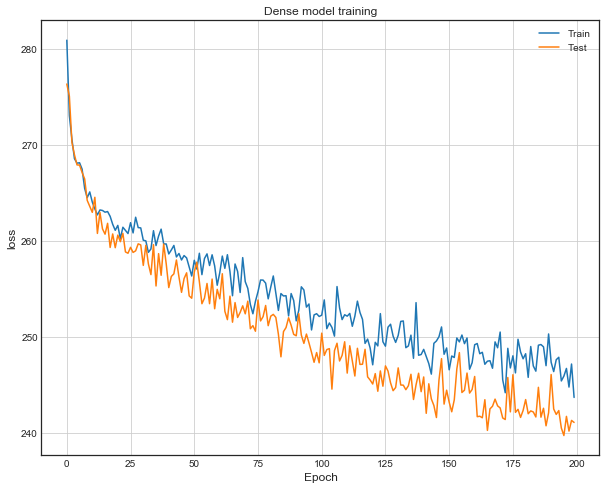

In [271]:
plt.figure(figsize=(10, 8))
plt.title("Dense model training", fontsize=12)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Test")
plt.grid("on")
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("loss", fontsize=12)
plt.legend(loc="upper right")

In [240]:
class Result():
    def __init__(self):
        self.result = pd.DataFrame({'model': [],'MAE' :  [],'MSE': []})
    def update(self, model,X_test,y_test,model_name,y_pred = None):
        if  y_pred is None:
            y_pred = model.predict(X_test)
        new_df =pd.DataFrame({'MSE': round(mean_absolute_error(y_pred,y_test),2) ,
                                'MAE' :  round(sqrt(mean_squared_error(y_pred,y_test)),2),
                                'model': model_name},index = [1])
        self.result = self.result.append(new_df, ignore_index=True)
    def get(self):
        return self.result.set_index('model')
    